In [19]:
import re
from pytesseract import Output
import numpy as np
import cv2
import imutils
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'


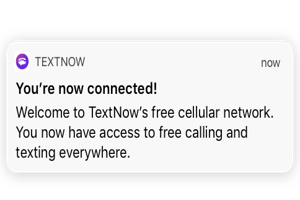

In [20]:
image = Image.open("img_with_text.png")
image = image.resize((300, 200))
image.save('img_with_text.png')
image


In [21]:
image = cv2.imread('img_with_text.png')


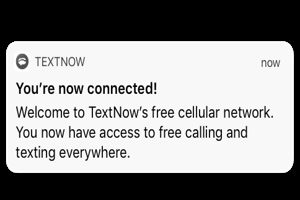

In [22]:
# color to grayscale(black n white)
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray = get_grayscale(image)
Image.fromarray(gray)


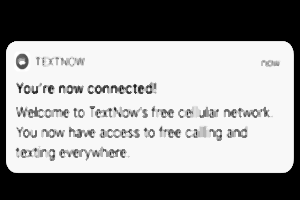

In [23]:
# removing noise
def remove_noise(image):
    return cv2.medianBlur(image, 3)


noise = remove_noise(gray)
Image.fromarray(noise)


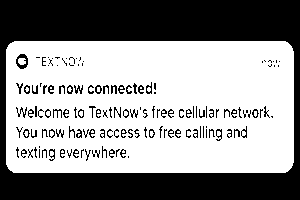

In [24]:
# thresholding (1 if val > threshold else 0)
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


thresh = thresholding(gray)
Image.fromarray(thresh)


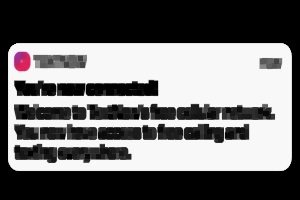

In [25]:
# erosion
def erosion(inage):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)


erode = erosion(gray)
Image.fromarray(erode)


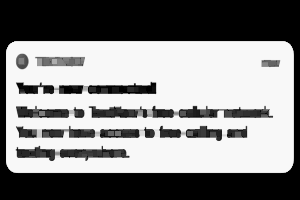

In [26]:
# morphology
def morph(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel=kernel)


morph = morph(gray)
Image.fromarray(morph)


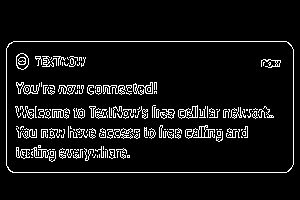

In [27]:
# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)


canny = canny(gray)
Image.fromarray(canny)


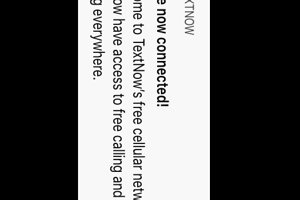

In [28]:
# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(
        image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


rotated = deskew(gray)
Image.fromarray(rotated)


In [29]:
# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)


match = match_template(gray, gray)
match


array([[1.]], dtype=float32)

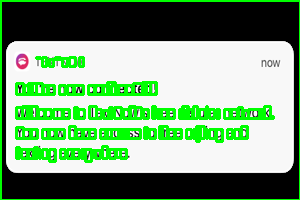

In [30]:
# Drawing rectangle around text
img = image
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(
        img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)

Welcome


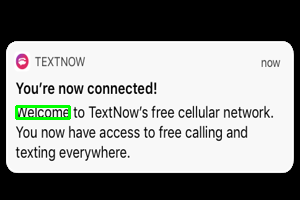

In [31]:
# Drawing pattern on specific pattern or word
img = cv2.imread('img_with_text.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = 'Welcome'

n_boxes = len(d['text'])
for i in range(n_boxes):
	if int(float(d['conf'][i])) > 60:
		if re.match(date_pattern, d['text'][i]):
			(x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
			img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
			print(d['text'][i])
	        
Image.fromarray(img)

In [32]:
rotated.shape


(200, 300)

In [33]:
import matplotlib.pyplot as plt

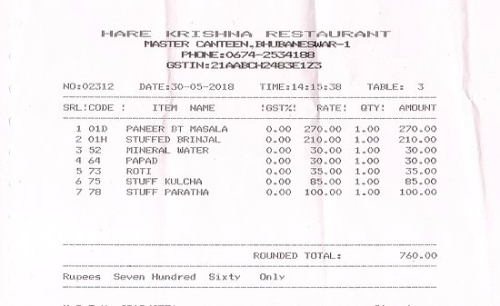

In [34]:
# load the input image from disk, resize it, and compute the ratio
# of the *new* width to the *old* width
orig = cv2.imread('bill.jpg')
image = orig.copy()
image = imutils.resize(image, width=500)
ratio = orig.shape[1] / float(image.shape[1])
Image.fromarray(image)

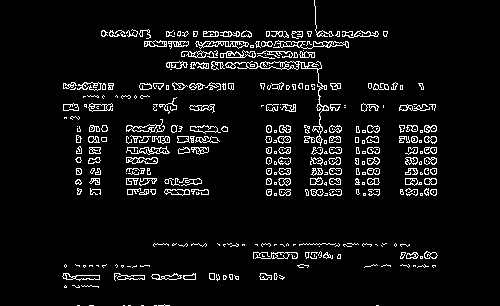

In [35]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(gray, 3)
edged = cv2.Canny(blurred, 75, 200)
Image.fromarray(edged)